<a href="https://colab.research.google.com/github/chandradharrao/Sentiment-Analysis/blob/master/Movie_Review_Classification_using_One_Hot_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
import numpy as np
def one_hot_encode(sequences,dimension = 10000): 
    numSequences = len(sequences)
    #one hot encoded vector will have 10k len vector with 0s except for index
    #corresponding to the presence of the int
    res = np.zeros((numSequences,dimension))
    for seqNum,seq in enumerate(sequences):
        for word in seq:
            res[seqNum,word] = 1
    return res
x_train = one_hot_encode(train_data)
x_test = one_hot_encode(test_data)

print(x_train)
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [3]:
#convert the labes from py lists t numpy arrays
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models,layers
from keras import optimizers

model = models.Sequential()
#input is a vector ie 1D tensor with shape(10000,) ie 100000 rows
#weight matrix is a 2D tensor with shape(10000,16)
#output = relu(inpt.weight + b)
model.add(layers.Dense(16,activation = "relu",input_shape = (10000,)))
model.add(layers.Dense(16,activation = "relu"))
#signmoid activation function to squash values between 0 to 1,hence one unit layer is enough
model.add(layers.Dense(1,activation = "sigmoid"))

In [5]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ['accuracy'])

In [6]:
#set aside first 10k samples to validate model on unseen data while training
x_val = x_train[:10000]
y_val = train_labels[:10000]
#the remaing samples for training
partial_x_train = x_train[10000:]
partial_y_train = train_labels[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.6131 - accuracy: 0.7175 - val_loss: 0.4375 - val_accuracy: 0.8614
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3678 - accuracy: 0.8957 - val_loss: 0.3270 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2569 - accuracy: 0.9220 - val_loss: 0.2984 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2062 - accuracy: 0.9328 - val_loss: 0.2785 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1560 - accuracy: 0.9528 - val_loss: 0.2763 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1306 - accuracy: 0.9611 - val_loss: 0.3053 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1126 - accuracy: 0.9672 - val_loss: 0.3037 - val_accuracy: 0.8817
Epoch 8/20
30

In [7]:
#history object contains the history member
history_dict = history.history
print("history obj keys",history_dict.keys())

history obj keys dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


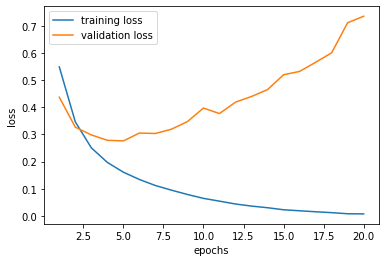

In [8]:
#plotting training and validation loss
import matplotlib.pyplot as plt
def plot_loss(history_dict,epochs):
    #loss during training
    training_loss = history_dict["loss"]
    #loss observed when validating on unseen data set
    validation_loss = history_dict["val_loss"]
    #x axis is number of epochs
    x = [x for x in range(1,epochs+1)]
    #y axis is the two types of losses encounterd
    y1 = [x for x in training_loss]
    y2 = [x for x in validation_loss]
    plt.plot(x,y1,label = "training loss" )
    plt.plot(x,y2,label = "validation loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()
    plt.show()
plot_loss(history_dict,20)

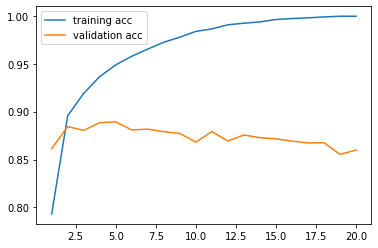

In [9]:
#pottig training and validation accuracy
def acc_plot(history_dict,epochs):
    training_acc = history_dict["accuracy"]
    validation_acc = history_dict["val_accuracy"]
    x = [x for x in range(1,epochs+1)]
    y1 = [x for x in training_acc]
    y2 = [x for x in validation_acc]
    plt.plot(x,y1,label = "training acc")
    plt.plot(x,y2,label = "validation acc")
    plt.legend()
    plt.show()
acc_plot(history_dict,20)

In [10]:
#from the above graphs we see that val acc dec after 3rd epoch and loss inc after 3rd epoch
#this isoverfitting where we are overoptimizing on the training data
#to prevent overfitting let us train only for 4 epochs
new_history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=3,
                        batch_size=512,
                        validation_data=(x_val,y_val))

Epoch 1/3
30/30 [==============================] - 1s 44ms/step - loss: 0.0047 - accuracy: 0.9998 - val_loss: 0.8057 - val_accuracy: 0.8517
Epoch 2/3
30/30 [==============================] - 1s 35ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.7889 - val_accuracy: 0.8592
Epoch 3/3
30/30 [==============================] - 1s 33ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.7933 - val_accuracy: 0.8651


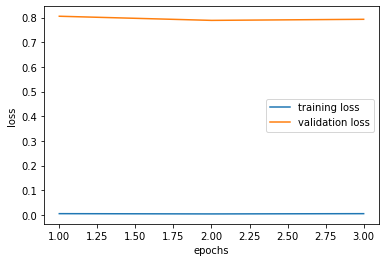

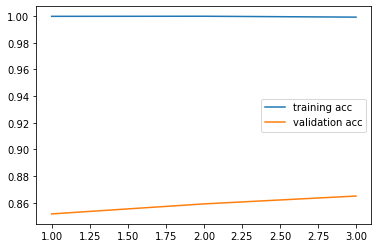

In [11]:
new_history_dict = new_history.history
plot_loss(new_history_dict,3)
acc_plot(new_history_dict,3)

In [12]:
#using the trained model to predict on new data
output = model.predict(x_test)
output

array([[0.00563028],
       [1.        ],
       [0.99933684],
       ...,
       [0.00157383],
       [0.02319247],
       [0.77830464]], dtype=float32)